In [40]:
#use "topfind"
#require "owl-jupyter"
open Owl_jupyter
open Owl
open Algodiff.D;;

- : unit = ()
Findlib has been successfully loaded. Additional directives:
  #require "package";;      to load a package
  #list;;                   to list the available packages
  #camlp4o;;                to load camlp4 (standard syntax)
  #camlp4r;;                to load camlp4 (revised syntax)
  #predicates "p,q,...";;   to set these predicates
  Topfind.reset();;         to force that packages will be reloaded
  #thread;;                 to enable threads

- : unit = ()


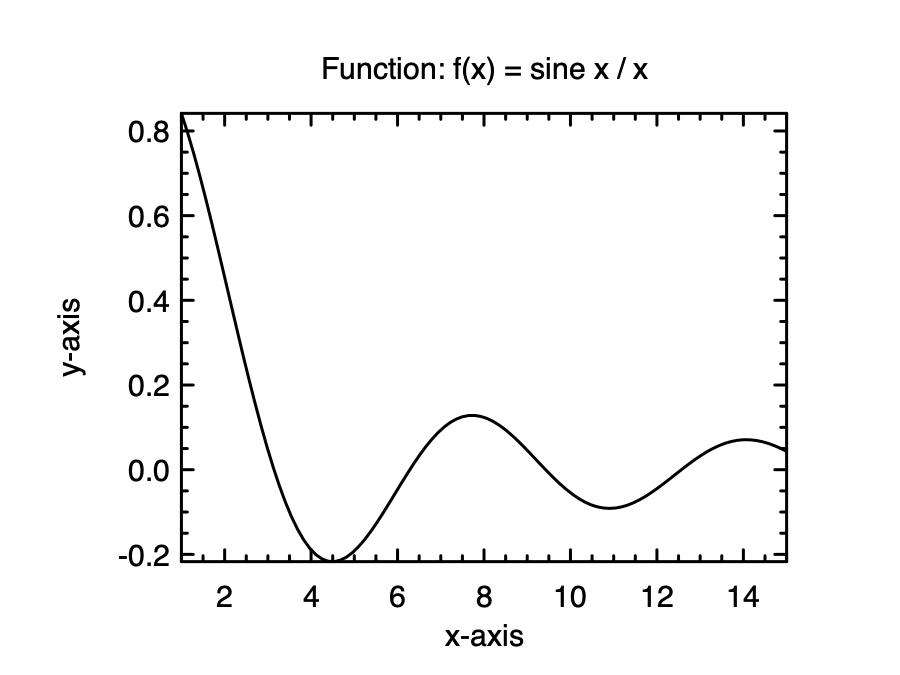

- : unit = ()


In [4]:
let f x = Maths.sin x /. x in
let h = Plot.create "plot_001.png" in
    Plot.set_title h "Function: f(x) = sine x / x";
    Plot.set_xlabel h "x-axis";
    Plot.set_ylabel h "y-axis";
    Plot.set_font_size h 8.;
    Plot.set_pen_size h 3.;
    Plot.plot_fun ~h f 1. 15.;
    Plot.output h
;;

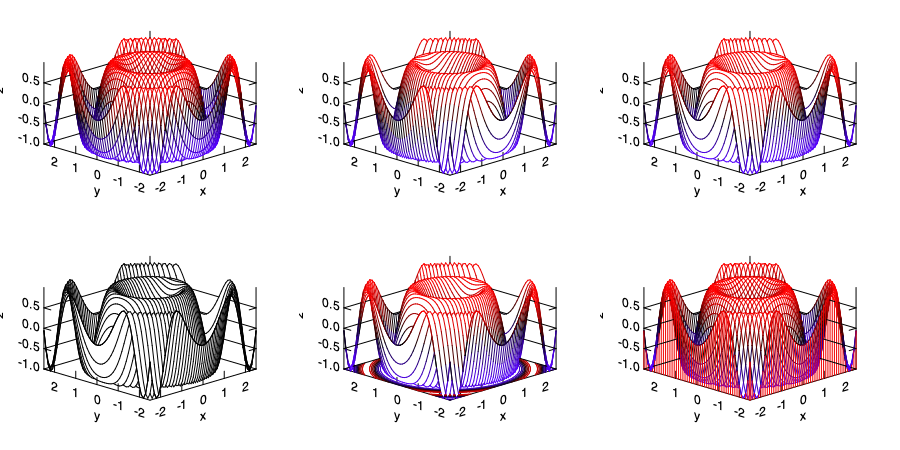

- : unit = ()


In [5]:
let x, y = Mat.meshgrid (-2.5) 2.5 (-2.5) 2.5 50 50 in
let z = Mat.(sin ((x * x) + (y * y))) in
let h = Plot.create ~m:2 ~n:3 "plot_020.png" in

Plot.subplot h 0 0;
Plot.(mesh ~h ~spec:[ ZLine XY ] x y z);

Plot.subplot h 0 1;
Plot.(mesh ~h ~spec:[ ZLine X ] x y z);

Plot.subplot h 0 2;
Plot.(mesh ~h ~spec:[ ZLine Y ] x y z);

Plot.subplot h 1 0;
Plot.(mesh ~h ~spec:[ ZLine Y; NoMagColor ] x y z);

Plot.subplot h 1 1;
Plot.(mesh ~h ~spec:[ ZLine Y; Contour ] x y z);

Plot.subplot h 1 2;
Plot.(mesh ~h ~spec:[ ZLine XY; Curtain ] x y z);

Plot.output h
;;

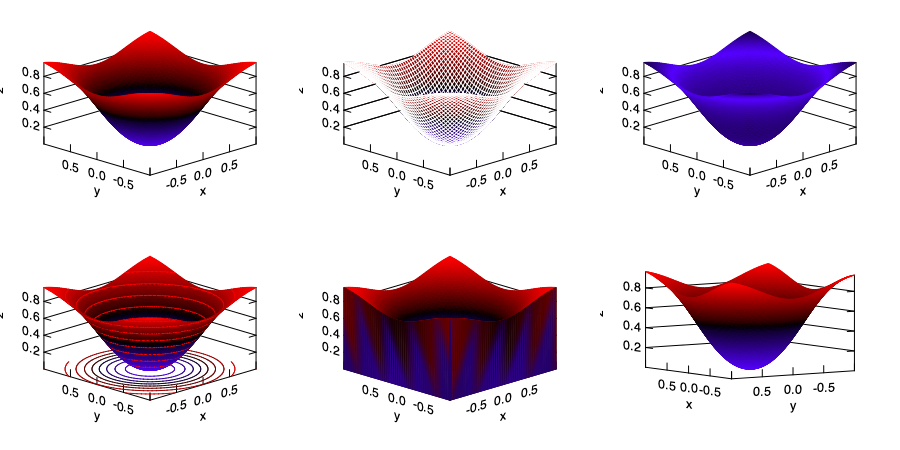

- : unit = ()


In [6]:
let x, y = Mat.meshgrid (-1.) 1. (-1.) 1. 50 50 in
let z = Mat.(tanh ((x * x) + (y * y))) in
let h = Plot.create ~m:2 ~n:3 "plot_021.png" in

Plot.subplot h 0 0;
Plot.(surf ~h ~spec:[ ] x y z);

Plot.subplot h 0 1;
Plot.(surf ~h ~spec:[ Faceted ] x y z);

Plot.subplot h 0 2;
Plot.(surf ~h ~spec:[ NoMagColor ] x y z);

Plot.subplot h 1 0;
Plot.(surf ~h ~spec:[ Contour ] x y z);

Plot.subplot h 1 1;
Plot.(surf ~h ~spec:[ Curtain ] x y z);

Plot.subplot h 1 2;
Plot.(surf ~h ~spec:[ Altitude 10.; Azimuth 125. ] x y z);

Plot.output h
;;

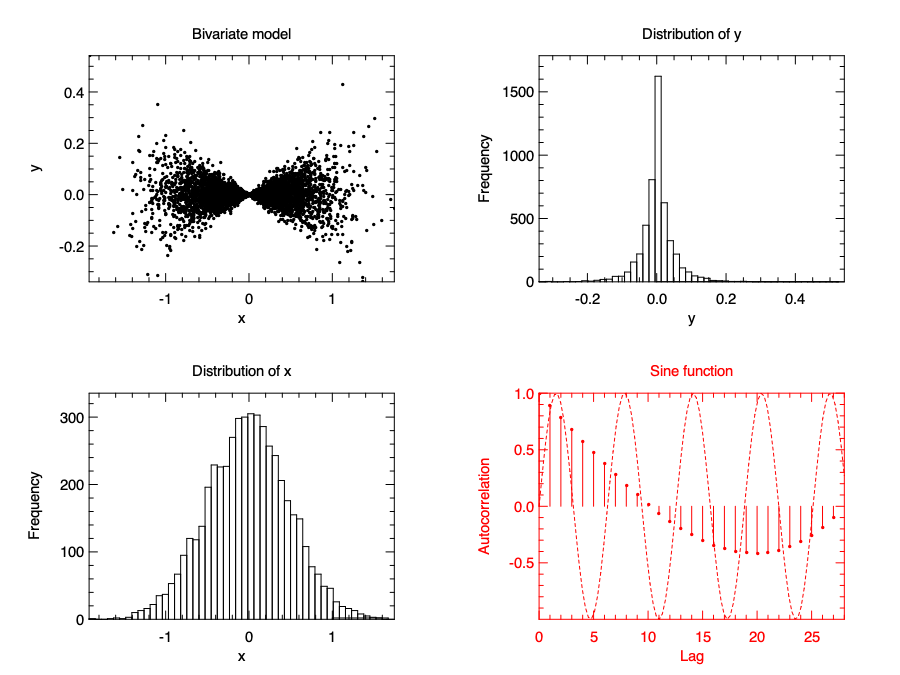

- : unit = ()


In [7]:
let f p i = match i with
  | 0 -> Stats.gaussian_rvs ~mu:0. ~sigma:0.5 +. p.(1)
  | _ -> Stats.gaussian_rvs ~mu:0. ~sigma:0.1 *. p.(0)
in
let y = Stats.gibbs_sampling f [|0.1;0.1|] 5_000 |> Mat.of_arrays in
let h = Plot.create ~m:2 ~n:2 "plot_002.png" in
Plot.set_background_color h 255 255 255;

(* focus on the subplot at 0,0 *)
Plot.subplot h 0 0;
Plot.set_title h "Bivariate model";
Plot.scatter ~h (Mat.col y 0) (Mat.col y 1);

(* focus on the subplot at 0,1 *)
Plot.subplot h 0 1;
Plot.set_title h "Distribution of y";
Plot.set_xlabel h "y";
Plot.set_ylabel h "Frequency";
Plot.histogram ~h ~bin:50 (Mat.col y 1);

(* focus on the subplot at 1,0 *)
Plot.subplot h 1 0;
Plot.set_title h "Distribution of x";
Plot.set_ylabel h "Frequency";
Plot.histogram ~h ~bin:50 (Mat.col y 0);

(* focus on the subplot at 1,1 *)
Plot.subplot h 1 1;
Plot.set_foreground_color h 255 0 0;
Plot.set_title h "Sine function";
Plot.(plot_fun ~h ~spec:[ LineStyle 2 ] Maths.sin 0. 28.);
Plot.autocorr ~h (Mat.sequential 1 28);

(* output your final plot *)
Plot.output h
;;

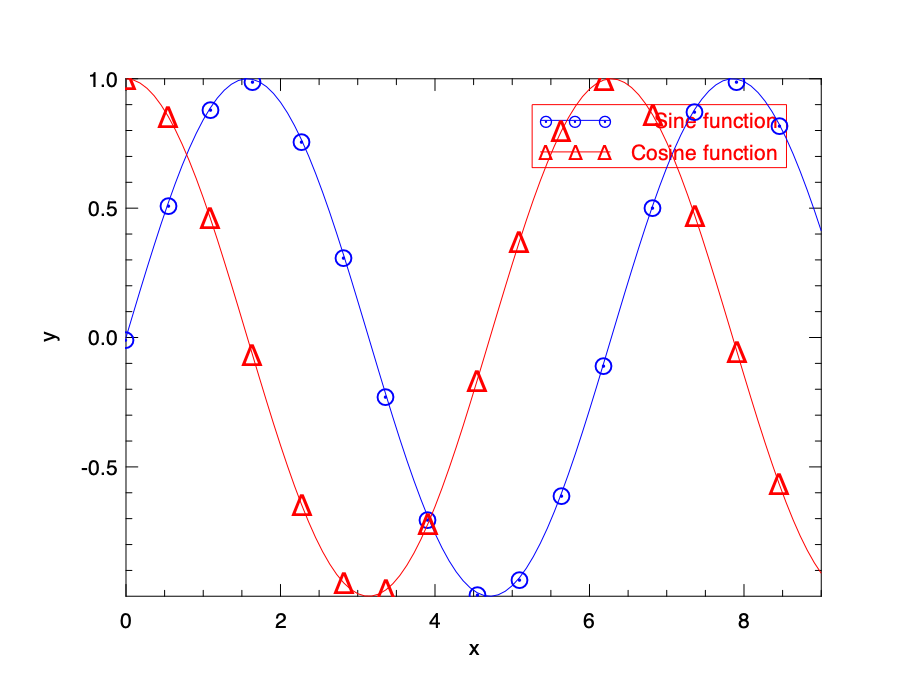

- : unit = ()


In [8]:
let h = Plot.create "plot_024.png" in
Plot.(plot_fun ~h ~spec:[ RGB (0,0,255); Marker "#[0x2299]"; MarkerSize 8. ] Maths.sin 0. 9.);
Plot.(plot_fun ~h ~spec:[ RGB (255,0,0); Marker "#[0x0394]"; MarkerSize 8. ] Maths.cos 0. 9.);
Plot.legend_on h [|"Sine function"; "Cosine function"|];
Plot.output h
;;

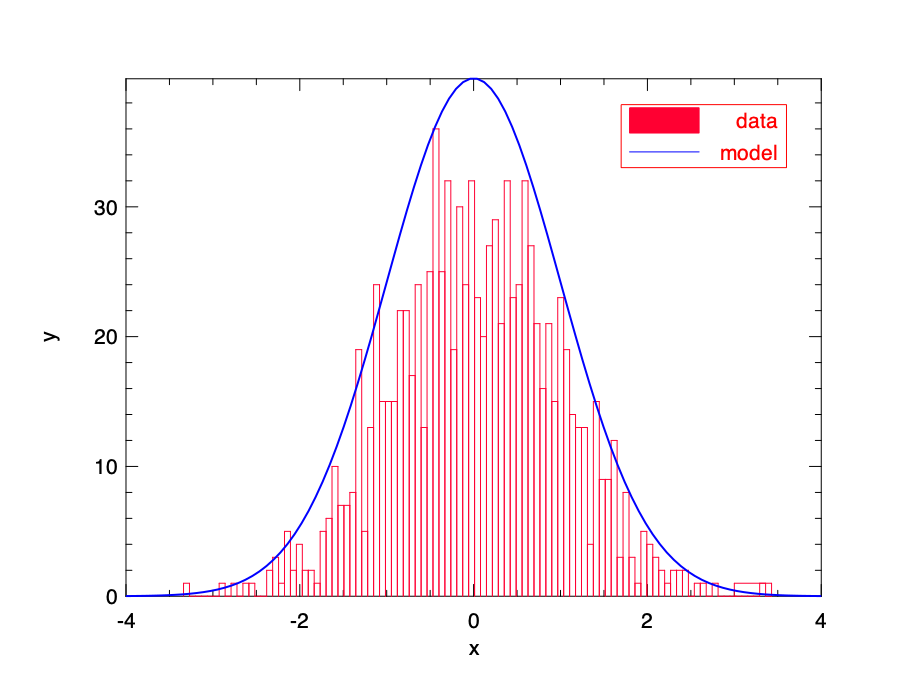

- : unit = ()


In [9]:
let g x = (Stats.gaussian_pdf x ~mu:0. ~sigma:1.) *. 100. in
let y = Mat.gaussian ~mu:0. ~sigma:1. 1 1000 in

(* plot multiple data sets *)
let h = Plot.create "plot_025.png" in
Plot.set_background_color h 255 255 255;
Plot.(histogram ~h ~spec:[ RGB (255,0,50) ] ~bin:100 y);
Plot.(plot_fun ~h ~spec:[ RGB (0,0,255); LineWidth 2. ] g (-4.) 4.);
Plot.legend_on h [|"data"; "model"|];

Plot.output h
;;

In [10]:
type legend_position =
  North | South | West | East | NorthWest | NorthEast | SouthWest | SouthEast

type legend_position =
    North
  | South
  | West
  | East
  | NorthWest
  | NorthEast
  | SouthWest
  | SouthEast


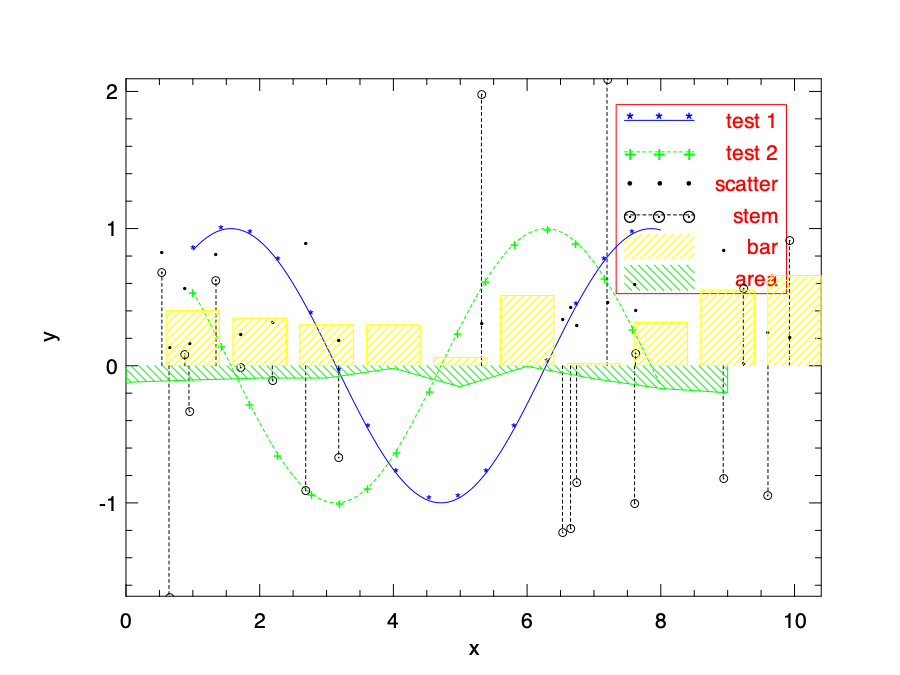

- : unit = ()


In [11]:
(* generate data *)
let x = Mat.(uniform 1 20 *$ 10.) in
let y = Mat.(uniform 1 20) in
let z = Mat.gaussian 1 20 in

(* plot multiple data sets *)
let h = Plot.create "plot_026.png" in
Plot.(plot_fun ~h ~spec:[ RGB (0,0,255); LineStyle 1; Marker "*" ] Maths.sin 1. 8.);
Plot.(plot_fun ~h ~spec:[ RGB (0,255,0); LineStyle 2; Marker "+" ] Maths.cos 1. 8.);
Plot.scatter ~h x y;
Plot.stem ~h x z;

let u = Mat.(abs(gaussian 1 10 *$ 0.3)) in
Plot.(bar ~h ~spec:[ RGB (255,255,0); FillPattern 3 ] u);

let v = Mat.(neg u *$ 0.3) in
let u = Mat.sequential 1 10 in
Plot.(area ~h ~spec:[ RGB (0,255,0); FillPattern 4 ] u v);

(* set up legend *)
Plot.(legend_on h ~position:NorthEast [|"test 1"; "test 2"; "scatter"; "stem"; "bar"; "area"|]);
Plot.output h
;;

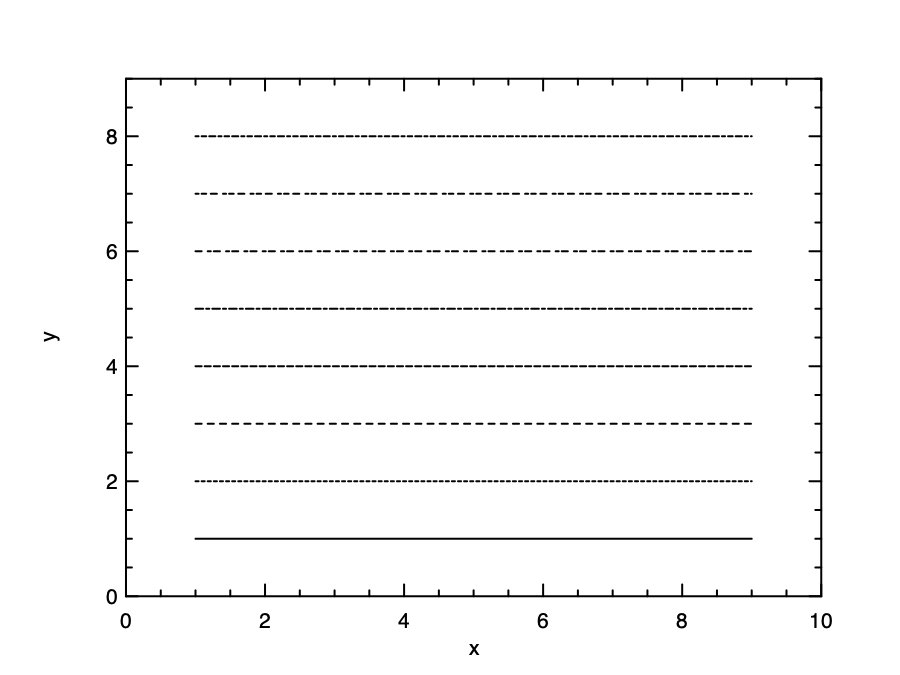

- : unit = ()


In [12]:
let h = Plot.create "plot_004.png" in
Plot.set_background_color h 255 255 255;
Plot.set_pen_size h 2.;
Plot.(draw_line ~h ~spec:[ LineStyle 1 ] 1. 1. 9. 1.);
Plot.(draw_line ~h ~spec:[ LineStyle 2 ] 1. 2. 9. 2.);
Plot.(draw_line ~h ~spec:[ LineStyle 3 ] 1. 3. 9. 3.);
Plot.(draw_line ~h ~spec:[ LineStyle 4 ] 1. 4. 9. 4.);
Plot.(draw_line ~h ~spec:[ LineStyle 5 ] 1. 5. 9. 5.);
Plot.(draw_line ~h ~spec:[ LineStyle 6 ] 1. 6. 9. 6.);
Plot.(draw_line ~h ~spec:[ LineStyle 7 ] 1. 7. 9. 7.);
Plot.(draw_line ~h ~spec:[ LineStyle 8 ] 1. 8. 9. 8.);
Plot.set_xrange h 0. 10.;
Plot.set_yrange h 0. 9.;
Plot.output h
;;

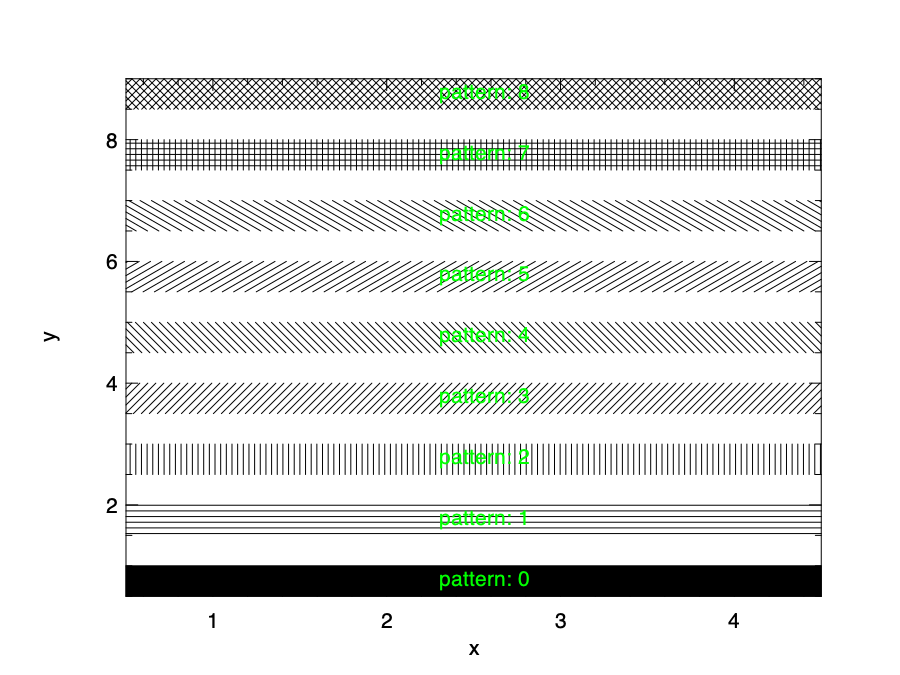

- : unit = ()


In [13]:
let h = Plot.create "plot_005.png" in

Array.init 9 (fun i ->
  let x0, y0 = 0.5, float_of_int i +. 1.0 in
  let x1, y1 = 4.5, float_of_int i +. 0.5 in
  Plot.(draw_rect ~h ~spec:[ FillPattern i ] x0 y0 x1 y1);
  Plot.(text ~h ~spec:[ RGB (0,255,0) ] 2.3 (y0-.0.2) ("pattern: " ^ (string_of_int i)))
) |> ignore;

Plot.output h
;;

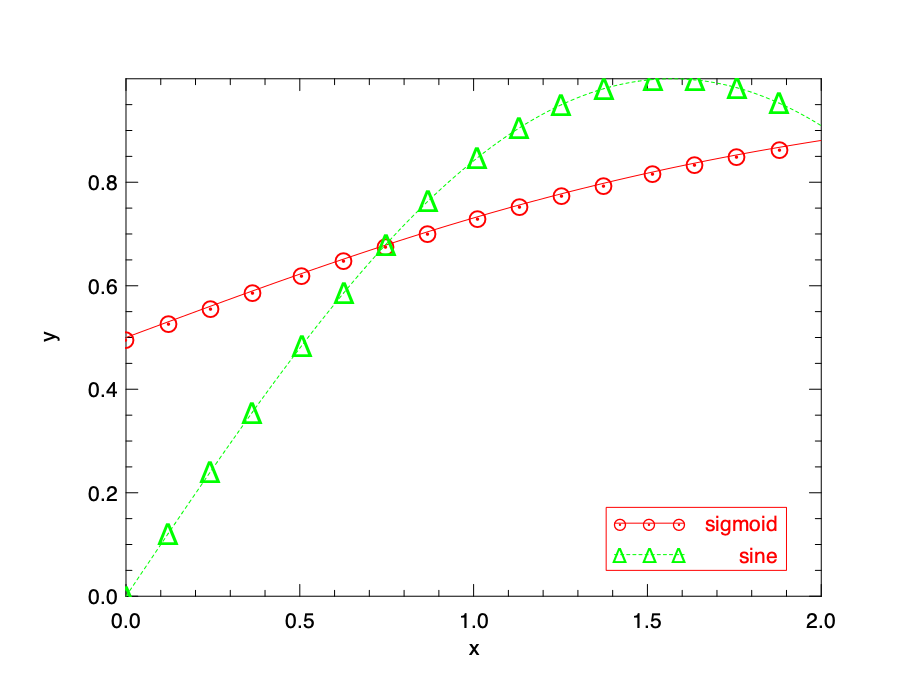

- : unit = ()


In [14]:
let x = Mat.linspace 0. 2. 100 in
let y0 = Mat.sigmoid x in
let y1 = Mat.map Maths.sin x in
let h = Plot.create "plot_022.png" in
Plot.(plot ~h ~spec:[ RGB (255,0,0); LineStyle 1; Marker "#[0x2299]"; MarkerSize 8. ] x y0);
Plot.(plot ~h ~spec:[ RGB (0,255,0); LineStyle 2; Marker "#[0x0394]"; MarkerSize 8. ] x y1);
Plot.(legend_on h ~position:SouthEast [|"sigmoid"; "sine"|]);
Plot.output h
;;

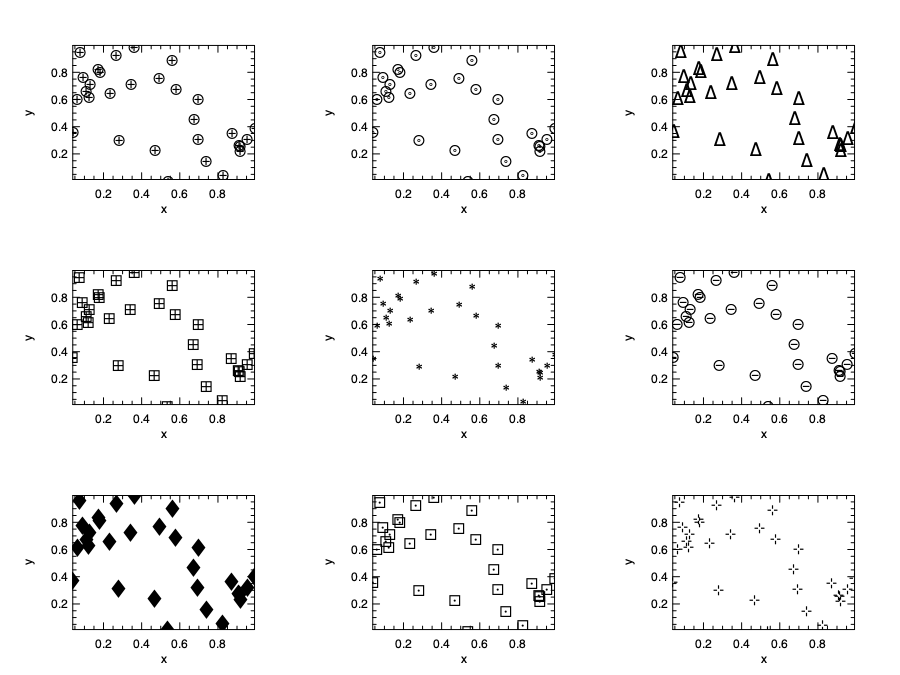

- : unit = ()


In [15]:
let x = Mat.uniform 1 30 in
let y = Mat.uniform 1 30 in
let h = Plot.create ~m:3 ~n:3 "plot_006.png" in
Plot.set_background_color h 255 255 255;
Plot.subplot h 0 0;
Plot.(scatter ~h ~spec:[ Marker "#[0x2295]"; MarkerSize 5. ] x y);
Plot.subplot h 0 1;
Plot.(scatter ~h ~spec:[ Marker "#[0x229a]"; MarkerSize 5. ] x y);
Plot.subplot h 0 2;
Plot.(scatter ~h ~spec:[ Marker "#[0x2206]"; MarkerSize 5. ] x y);
Plot.subplot h 1 0;
Plot.(scatter ~h ~spec:[ Marker "#[0x229e]"; MarkerSize 5. ] x y);
Plot.subplot h 1 1;
Plot.(scatter ~h ~spec:[ Marker "#[0x2217]"; MarkerSize 5. ] x y);
Plot.subplot h 1 2;
Plot.(scatter ~h ~spec:[ Marker "#[0x2296]"; MarkerSize 5. ] x y);
Plot.subplot h 2 0;
Plot.(scatter ~h ~spec:[ Marker "#[0x2666]"; MarkerSize 5. ] x y);
Plot.subplot h 2 1;
Plot.(scatter ~h ~spec:[ Marker "#[0x22a1]"; MarkerSize 5. ] x y);
Plot.subplot h 2 2;
Plot.(scatter ~h ~spec:[ Marker "#[0x22b9]"; MarkerSize 5. ] x y);
Plot.output h
;;

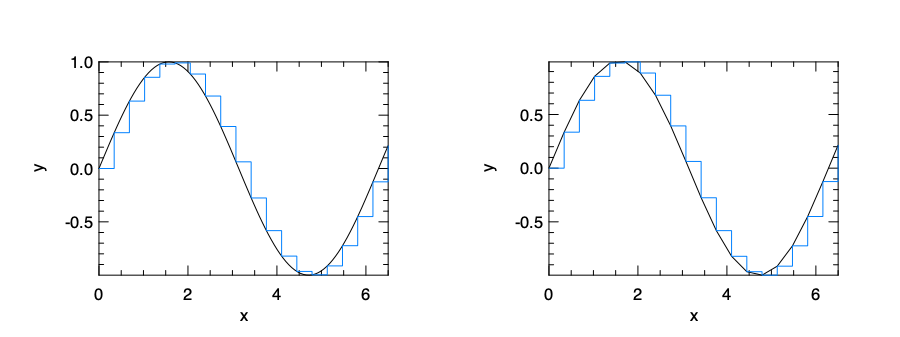

- : unit = ()


In [16]:
let x = Mat.linspace 0. 6.5 20 in
let y = Mat.map Maths.sin x in
let h = Plot.create ~m:1 ~n:2 "plot_007.png" in
Plot.set_background_color h 255 255 255;
Plot.subplot h 0 0;
Plot.plot_fun ~h Maths.sin 0. 6.5;
Plot.(stairs ~h ~spec:[ RGB (0,128,255) ] x y);
Plot.subplot h 0 1;
Plot.(plot ~h ~spec:[ RGB (0,0,0) ] x y);
Plot.(stairs ~h ~spec:[ RGB (0,128,255) ] x y);
Plot.output h
;;

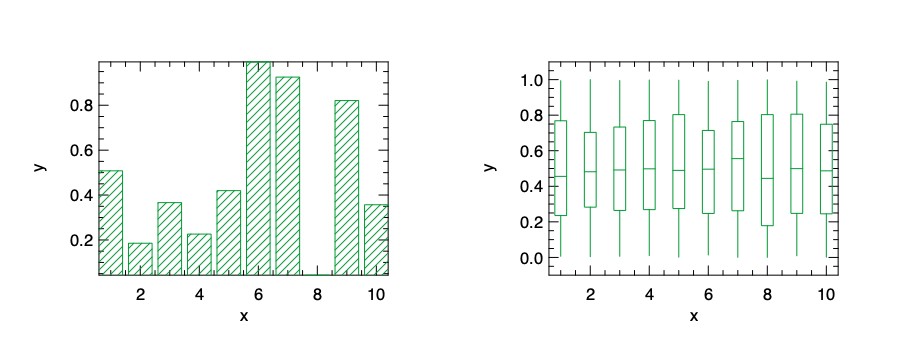

- : unit = ()


In [17]:
let y1 = Mat.uniform 1 10 in
let y2 = Mat.uniform 10 100 in
let h = Plot.create ~m:1 ~n:2 "plot_008.png" in
Plot.subplot h 0 0;
Plot.(bar ~h ~spec:[ RGB (0,153,51); FillPattern 3 ] y1);
Plot.subplot h 0 1;
Plot.(boxplot ~h ~spec:[ RGB (0,153,51) ] y2);
Plot.output h
;;

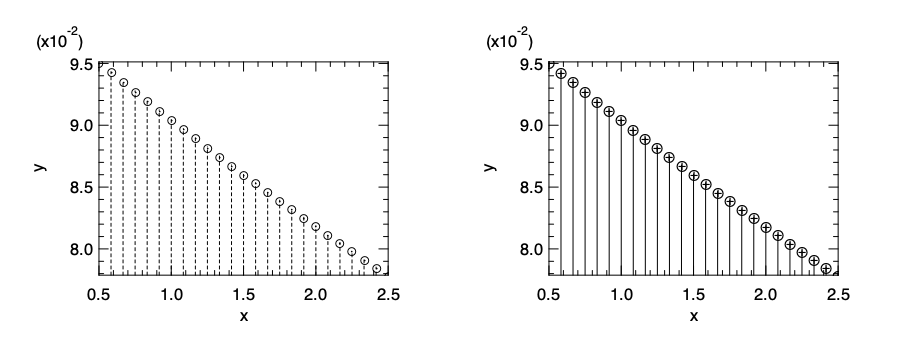

- : unit = ()


In [18]:
let x = Mat.linspace 0.5 2.5 25 in
let y = Mat.map (Stats.exponential_pdf ~lambda:0.1) x in
let h = Plot.create ~m:1 ~n:2 "plot_009.png" in
Plot.set_background_color h 255 255 255;
Plot.subplot h 0 0;
Plot.set_foreground_color h 0 0 0;
Plot.stem ~h x y;
Plot.subplot h 0 1;
Plot.(stem ~h ~spec:[ Marker "#[0x2295]"; MarkerSize 5.; LineStyle 1 ] x y);
Plot.output h
;;

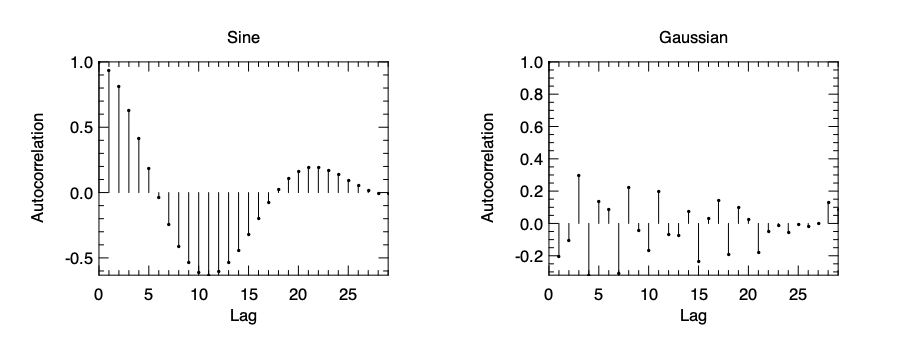

- : unit = ()


In [19]:
let x = Mat.linspace 0. 8. 30 in
let y0 = Mat.map Maths.sin x in
let y1 = Mat.uniform 1 30 in
let h = Plot.create ~m:1 ~n:2 "plot_010.png" in
Plot.subplot h 0 0;
Plot.set_title h "Sine";
Plot.autocorr ~h y0;
Plot.subplot h 0 1;
Plot.set_title h "Gaussian";
Plot.autocorr ~h y1;
Plot.output h
;;

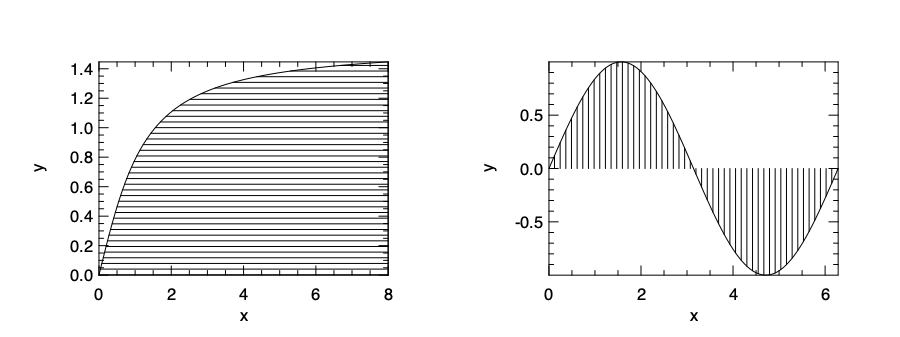

- : unit = ()


In [20]:
let x = Mat.linspace 0. 8. 100 in
let y = Mat.map Maths.atan x in
let h = Plot.create ~m:1 ~n:2 "plot_011.png" in
Plot.subplot h 0 0;
Plot.(area ~h ~spec:[ FillPattern 1 ] x y);
let x = Mat.linspace 0. (2. *. 3.1416) 100 in
let y = Mat.map Maths.sin x in
Plot.subplot h 0 1;
Plot.(area ~h ~spec:[ FillPattern 2 ] x y);
Plot.output h
;;

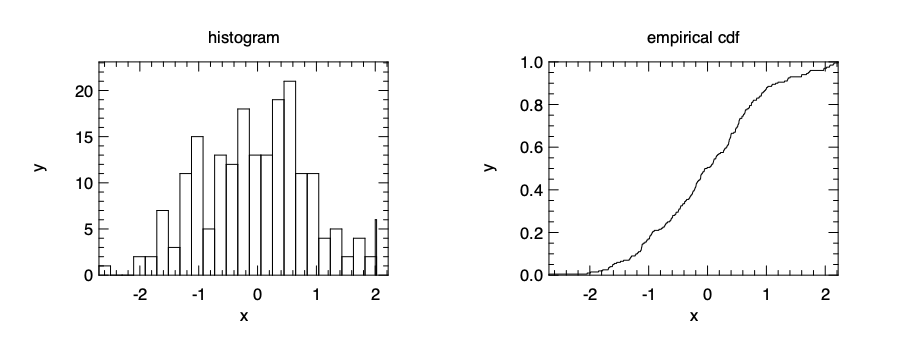

- : unit = ()


In [21]:
let x = Mat.gaussian 200 1 in
let h = Plot.create ~m:1 ~n:2 "plot_012.png" in
Plot.subplot h 0 0;
Plot.set_title h "histogram";
Plot.histogram ~h ~bin:25 x;
Plot.subplot h 0 1;
Plot.set_title h "empirical cdf";
Plot.ecdf ~h x;
Plot.output h
;;

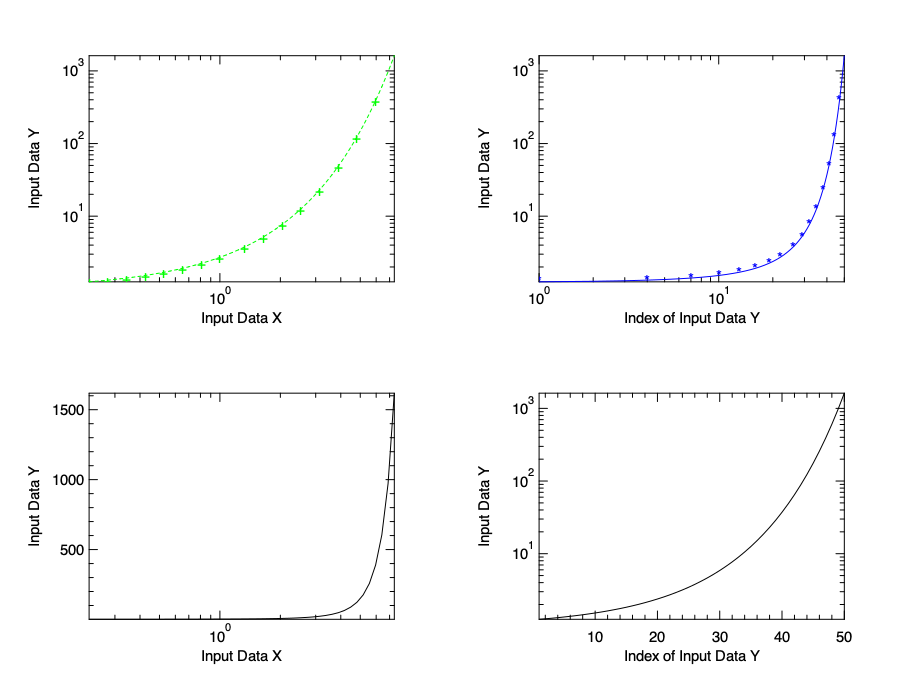

- : unit = ()


In [22]:
let x = Mat.logspace (-1.5) 2. 50 in
let y = Mat.map Maths.exp x in
let h = Plot.create ~m:2 ~n:2 "plot_013.png" in

Plot.subplot h 0 0;
Plot.set_xlabel h "Input Data X";
Plot.set_ylabel h "Input Data Y";
Plot.(loglog ~h ~spec:[ RGB (0,255,0); LineStyle 2; Marker "+" ] ~x:x y);

Plot.subplot h 0 1;
Plot.set_xlabel h "Index of Input Data Y";
Plot.set_ylabel h "Input Data Y";
Plot.(loglog ~h ~spec:[ RGB (0,0,255); LineStyle 1; Marker "*" ] y);

Plot.subplot h 1 0;
Plot.set_xlabel h "Input Data X";
Plot.set_ylabel h "Input Data Y";
Plot.semilogx ~h ~x:x y;

Plot.subplot h 1 1;
Plot.set_xlabel h "Index of Input Data Y";
Plot.set_ylabel h "Input Data Y";
Plot.semilogy ~h y;

Plot.output h
;;

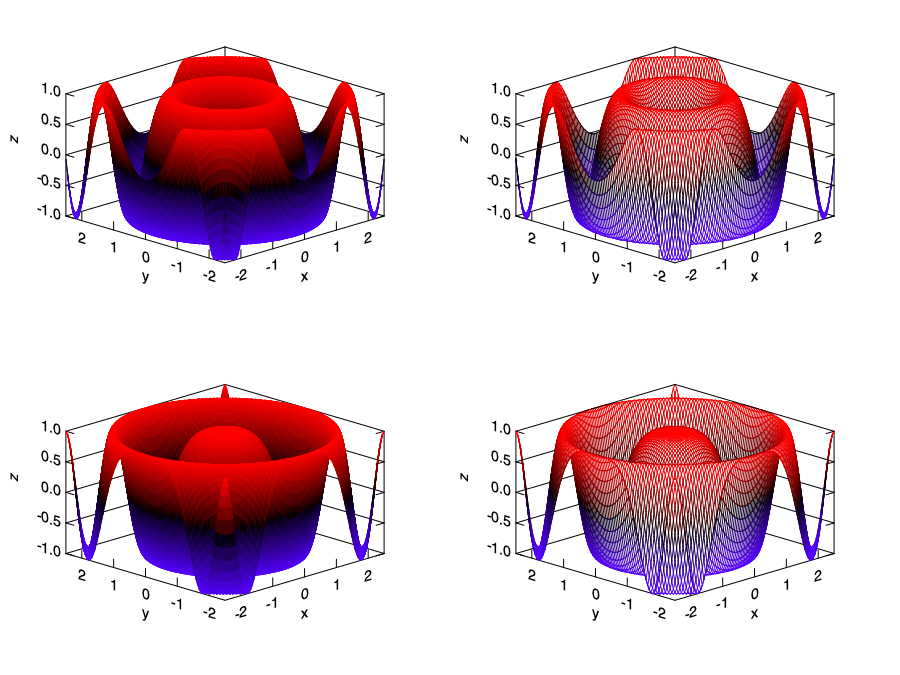

- : unit = ()


In [23]:
let x, y = Mat.meshgrid (-2.5) 2.5 (-2.5) 2.5 100 100 in
let z0 = Mat.(sin ((x **$ 2.) + (y **$ 2.))) in
let z1 = Mat.(cos ((x **$ 2.) + (y **$ 2.))) in
let h = Plot.create ~m:2 ~n:2 "plot_014.png" in
Plot.subplot h 0 0;
Plot.surf ~h x y z0;
Plot.subplot h 0 1;
Plot.mesh ~h x y z0;
Plot.subplot h 1 0;
Plot.surf ~h x y z1;
Plot.subplot h 1 1;
Plot.mesh ~h x y z1;
Plot.output h
;;

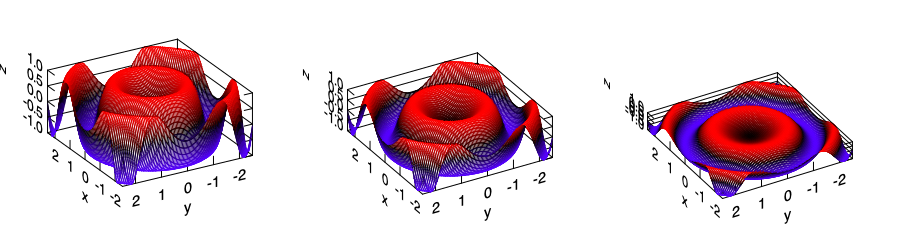

- : unit = ()


In [24]:
let x, y = Mat.meshgrid (-2.5) 2.5 (-2.5) 2.5 100 100 in
let z = Mat.(sin ((x * x) + (y * y))) in
let h = Plot.create ~m:1 ~n:3 "plot_015.png" in
Plot.subplot h 0 0;
Plot.(mesh ~h ~spec:[ Altitude 50.; Azimuth 120. ] x y z);
Plot.subplot h 0 1;
Plot.(mesh ~h ~spec:[ Altitude 65.; Azimuth 120. ] x y z);
Plot.subplot h 0 2;
Plot.(mesh ~h ~spec:[ Altitude 80.; Azimuth 120. ] x y z);
Plot.output h
;;

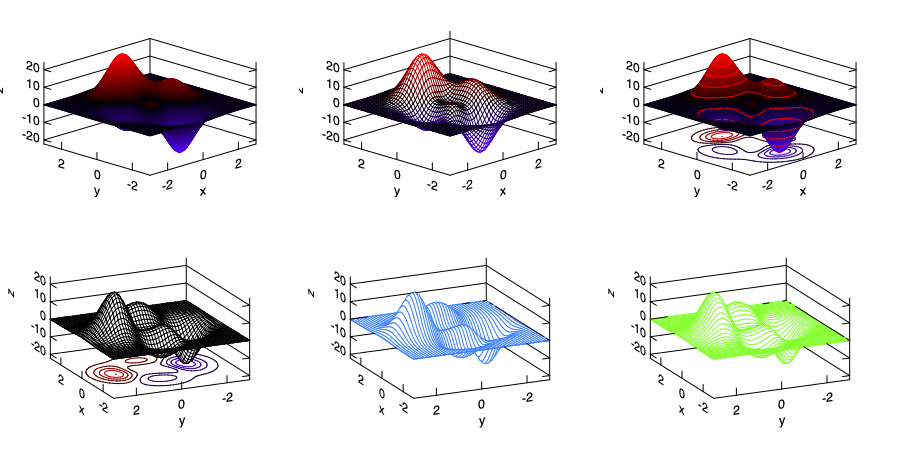

- : unit = ()


In [25]:
let x, y = Mat.meshgrid (-3.) 3. (-3.) 3. 50 50 in
let z = Mat.(
  3. $* ((1. $- x) **$ 2.) * exp (neg (x **$ 2.) - ((y +$ 1.) **$ 2.)) -
  (10. $* (x /$ 5. - (x **$ 3.) - (y **$ 5.)) * (exp (neg (x **$ 2.) - (y **$ 2.)))) -
  ((1./.3.) $* exp (neg ((x +$ 1.) **$ 2.) - (y **$ 2.)))
  )
in

let h = Plot.create ~m:2 ~n:3 "plot_016.png" in
Plot.subplot h 0 0;
Plot.surf ~h x y z;
Plot.subplot h 0 1;
Plot.mesh ~h x y z;
Plot.subplot h 0 2;
Plot.(surf ~h ~spec:[ Contour ] x y z);
Plot.subplot h 1 0;
Plot.(mesh ~h ~spec:[ Contour; Azimuth 115.; NoMagColor ] x y z);
Plot.subplot h 1 1;
Plot.(mesh ~h ~spec:[ Azimuth 115.; ZLine X; NoMagColor; RGB (61,129,255) ] x y z);
Plot.subplot h 1 2;
Plot.(mesh ~h ~spec:[ Azimuth 115.; ZLine Y; NoMagColor; RGB (130,255,40) ] x y z);
Plot.output h
;;

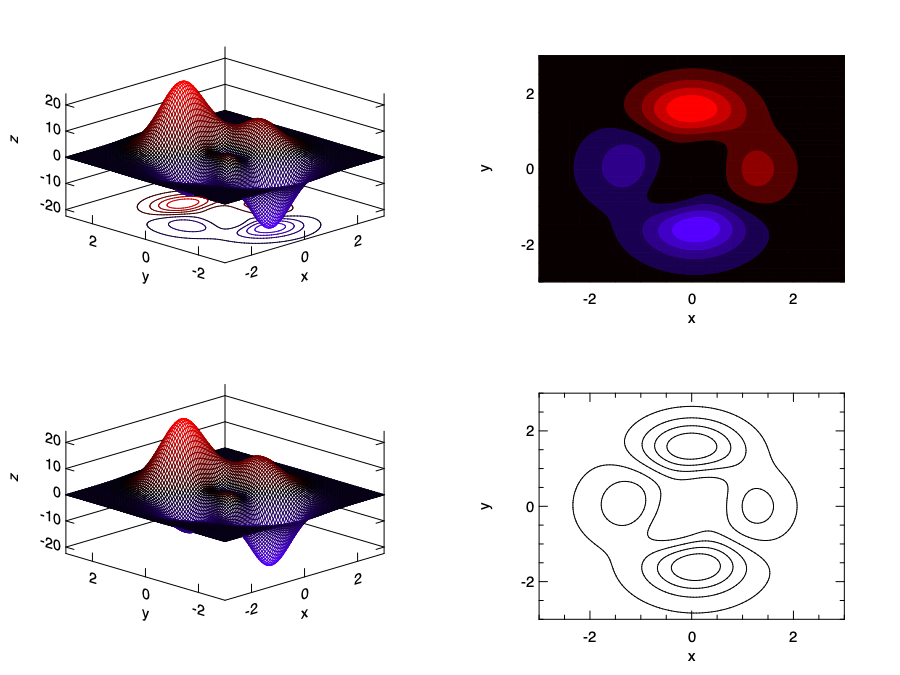

- : unit = ()


In [26]:
let x, y = Mat.meshgrid (-3.) 3. (-3.) 3. 100 100 in
let z = Mat.(
  3. $* ((1. $- x) **$ 2.) * exp (neg (x **$ 2.) - ((y +$ 1.) **$ 2.)) -
  (10. $* (x /$ 5. - (x **$ 3.) - (y **$ 5.)) * (exp (neg (x **$ 2.) - (y **$ 2.)))) -
  ((1./.3.) $* exp (neg ((x +$ 1.) **$ 2.) - (y **$ 2.)))
  )
in

let h = Plot.create ~m:2 ~n:2 "plot_017.png" in
Plot.subplot h 0 0;
Plot.(mesh ~h ~spec:[ Contour ] x y z);
Plot.subplot h 0 1;
Plot.heatmap ~h x y z;
Plot.subplot h 1 0;
Plot.mesh ~h x y z;
Plot.subplot h 1 1;
Plot.contour ~h x y z;
Plot.output h
;;

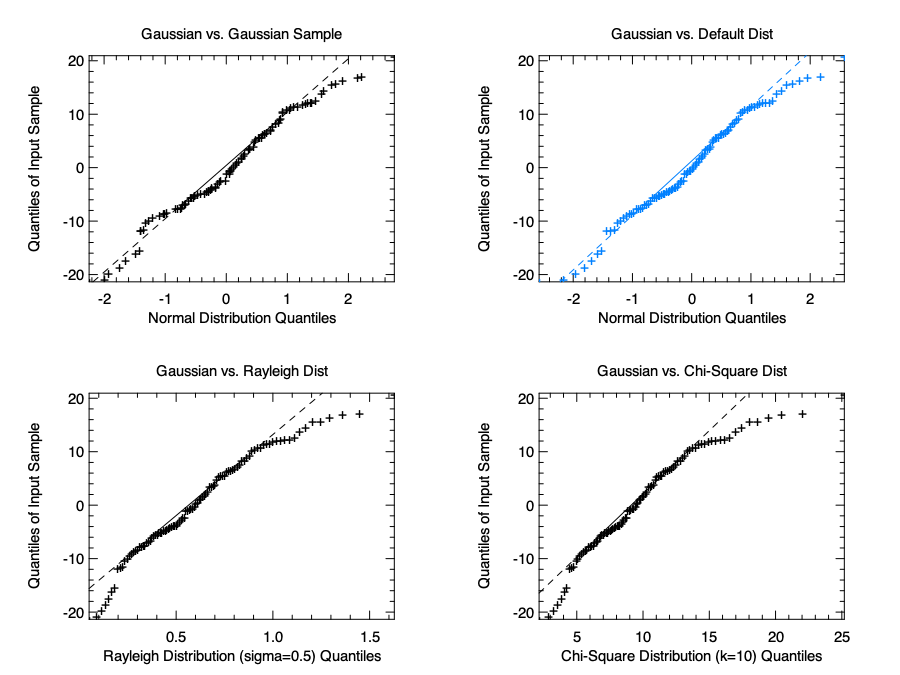

- : unit = ()


In [27]:
let y = Mat.(gaussian 100 1 *$ 10.) in
let x = Mat.gaussian 200 1 in
let h = Plot.create ~m:2 ~n:2 "plot_018.png" in

Plot.subplot h 0 0;
Plot.set_title h "Gaussian vs. Gaussian Sample";
Plot.set_ylabel h "Quantiles of Input Sample";
Plot.set_xlabel h "Normal Distribution Quantiles";
Plot.qqplot ~h y ~x:x;

Plot.subplot h 0 1;
Plot.set_title h "Gaussian vs. Default Dist";
Plot.set_ylabel h "Quantiles of Input Sample";
Plot.set_xlabel h "Normal Distribution Quantiles";
Plot.(qqplot ~h y ~spec:[RGB (0,128,255)]);

Plot.subplot h 1 0;
Plot.set_title h "Gaussian vs. Rayleigh Dist";
Plot.set_ylabel h "Quantiles of Input Sample";
Plot.set_xlabel h "Rayleigh Distribution (sigma=0.5) Quantiles";
Plot.qqplot ~h y ~pd:(fun p -> Stats.rayleigh_ppf p 0.5);

Plot.subplot h 1 1;
Plot.set_title h "Gaussian vs. Chi-Square Dist";
Plot.set_ylabel h "Quantiles of Input Sample";
Plot.set_xlabel h "Chi-Square Distribution (k=10) Quantiles";
Plot.qqplot ~h y ~pd:(fun p -> Stats.chi2_ppf p 10.);

Plot.output h
;;

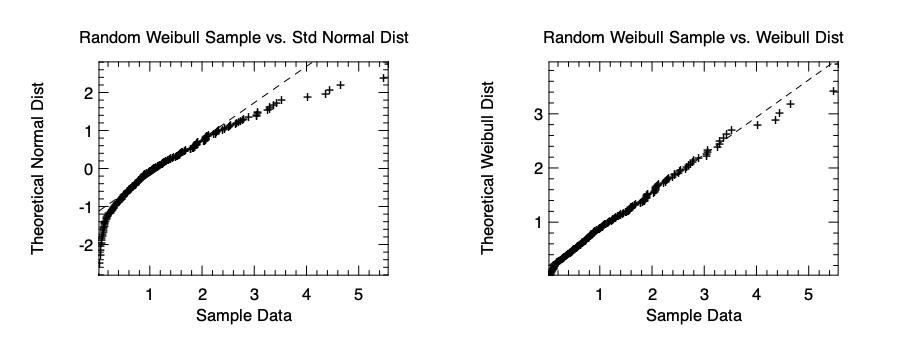

- : unit = ()


In [28]:
let x = Mat.empty 200 1 |> Mat.map (fun _ -> Stats.weibull_rvs 1.2 1.5) in
let h = Plot.create ~m:1 ~n:2 "plot_019.png" in

Plot.subplot h 0 0;
Plot.set_title h "Random Weibull Sample vs. Std Normal Dist";
Plot.set_xlabel h "Sample Data";
Plot.set_ylabel h "Theoretical Normal Dist";
Plot.normplot ~h x;

Plot.subplot h 0 1;
Plot.set_title h "Random Weibull Sample vs. Weibull Dist";
Plot.set_xlabel h "Sample Data";
Plot.set_ylabel h "Theoretical Weibull Dist";
Plot.wblplot ~h ~lambda:1.2 ~k:1.5 x;
Plot.output h
;;